In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_decision_regions

from sklearn import tree

## 엔트로피entropy
* 물리 열역학의 관점에서의 정의
    + 물질의 열적 상태를 나타내는 물리량의 하나
    + 보통 무질서도라고 함
    + 엔트로피가 높으면 무질서도 증가
* 통계적 관점에서의 정의
    + 정보이득information gain의 혼잡도
    + 엔트로피가 높으면 **정보이해가 어려워 짐**    
* 학습데이터는 기본적으로 **혼잡한 상태**임
     + 따라서, 어떤 조건으로 분류해야만 전체 혼잡도가 개선되는지 계산
     + 정리한 결과에 대해 다시 계산해서 처리를 반복 적용함
     + 즉, 정보의 불확실성을 수치로 나타낸 것을 의미 

## 엔트로피의 식
* $ entropy = -\sum p_k \log_2 p_k $
* 복수의 현상(1~n)이 존재할때 그 혼잡도를 나타내는 엔트로피의 식
     + -p(현상1) * log(p(현상1)) + -p(현상2) * log(p(현상2)) + ... ... -p(현상n) * log(p(현상n))
* 참고) 엔트로피는 일반적으로 2를 밑으로 하는 로그로 계산함
    + 단, 자연로그로도 엔트로피를 계산하기도 함     

In [ ]:
# x를 기준으로 y를 나누는 가장 좋은 방법은?
# x = [1,2,3,4,5,6,7,8]
# y = [0,0,0,1,1,1,1,1]

# 방법1) x : 3.5 (최적의 조건)
# 방법2) x : 4.5 (오분류의 가능성 존재)

In [1]:
# ex) 확률 0.1의 현상이 10개 일어난 경우 엔트로피는?
# -p(현상1) * log(p(현상1))
import math

# -0.1 * math.log2(0.1)       # 0.332
-0.1 * math.log2(0.1) * 10    # 3.321

3.3219280948873626

In [2]:
# ex) 확률 0.25의 현상이 4개 일어난 경우 엔트로피는?
-0.25 * math.log2(0.25) * 4

2.0

## 10마리의 동물이 개인지 고양이인지 분류

In [ ]:
# big   follow   walking      class
# yes     yes    yes          dog
# yes     yes    no           cat
# no      yes    yes          dog
# yes     yes    yes          dog
# no      no     yes          cat

# yes     no     yes          dog
# yes     no     yes          cat
# no      no     no           cat
# yes     yes    yes          dog
# no      yes    no           dog

### 1) target에 대한 entropy 계산
+ 10마리 중 개는 6, 고양이는 4
+ 개로 분류될 확률 : 6/10
+ 고양이로 분류될 확률 4/10
    *  entropy = -(0.6) * math.log2(0.6) -  (0.4) * math.log2(0.4)


In [6]:
-(0.6) * math.log2(0.6) -  (0.4) * math.log2(0.4)

0.9709505944546686

#### 1a) 덩치를 기준으로 분류시 엔트로피 계산
+ 덩치가 큰 것으로 분류 : (6) - 개:고양이 = 4:2
+ 덩치가 큰 경우 개로 분류 :  4/6 = 0.667
+ 덩치가 큰 경우 고양이로 분류 : 2/6 = 0.333

In [9]:
-(0.667) * math.log2(0.667) -  (0.333) * math.log2(0.333)

0.9179621399872385

#### 1b) 덩치를 기준으로 분류시 엔트로피 계산
+ 덩치가 작은 것으로 분류 : (4) - 개:고양이 = 2:2
+ 덩치가 작은 경우 개로 분류 :  2/4 = 0.5
+ 덩치가 작은 경우 고양이로 분류 : 2/4 = 0.5
     * -(0.5) * math.log2(0.5)*2

In [10]:
-(0.5) * math.log2(0.5)*2

1.0

#### 1c) 덩치를 기준으로 분류시 최종 엔트로피 계산
+ 덩치로 분류했을때의 엔트로피는 
+ 개로 분류될 확률 x 덩치로 분류될 확률과   
+ 고양이로 분류될 확률 x 덩치로 분류될 확률을 
+ 더해준 결과값이 됨

In [11]:
0.6 * 0.917 + 0.4 * 1.0

0.9502

#### 2a) 따름을 기준으로 분류시 엔트로피 계산

In [14]:
# (6) - 5:1, 6/5 6/1
-(5/6) * math.log2(5/6) - (1/6) * math.log2(1/6)

0.6500224216483541

#### 2b) 따름을 기준으로 분류시 엔트로피 계산

In [17]:
# (4) - 1:3
-(1/4) * math.log2(1/4) - (3/4) * math.log2(3/4)

0.8112781244591328

#### 2c) 따름을 기준으로 분류시 최종 엔트로피 계산

In [18]:
0.6 * 0.65 + 0.4 * 0.811

0.7144

In [ ]:
# big   follow   walking      class
# yes     yes    yes          dog
# yes     yes    no           cat
# no      yes    yes          dog
# yes     yes    yes          dog
# no      no     yes          cat

# yes     no     yes          dog
# yes     no     yes          cat
# no      no     no           cat
# yes     yes    yes          dog
# no      yes    no           dog

#### 3a) 산책을 기준으로 분류시 엔트로피 계산

In [19]:
# (7) - 5:2
-(5/7) * math.log2(5/7) - (2/7) * math.log2(2/7)

0.863120568566631

#### 3a) 산책을 기준으로 분류시 엔트로피 계산

In [20]:
# (3) - 1:2
-(1/3) * math.log2(1/3) - (2/3) * math.log2(2/3)

0.9182958340544896

#### 3a) 산책을 기준으로 분류시 최종 엔트로피 계산

In [21]:
0.6 * 0.86 + 0.4 * 0.91

0.8800000000000001

#### 4) 최종 결론
+ 덩치, 따름, 산책여부에 따라 정보의 불확실수치들을 비교
    * 덩치:    0.970 -> 0.9502
    * 따름:    0.970 -> 0.7144(!!)
    * 산책여부:    0.970 -> 0.8845

### 개/고양이 의사결정나무로 분류하기

In [57]:
catdog = pd.read_csv('data/catdog.csv')
# dc = dc.replace('yes',1).replace('no',0).replace('dog',1).replace('cat',0)

In [52]:
# 범주형 변수를 레이블 인코딩 하기 1
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# encoder.fit(catdog.big)

# catdog.big = encoder.transform(catdog.big)
# catdog.follow = encoder.fit_transform(catdog.follow)
# catdog.walking = encoder.fit_transform(catdog.walking)

# encoder = LabelEncoder()
# encoder.fit(catdog['class'])

# catdog['class'] = encoder.transform(catdog['class'])

In [61]:
# 범주형 변수를 레이블 인코딩 하기 2
# pd.Categorical(변수), 변수.cat.codes
cols = ['big','follow','walking','class']

for c in cols:
    catdog[c] = pd.Categorical(catdog[c])
    catdog[c] = catdog[c].cat.codes

In [33]:
data = catdog.iloc[:, :3]
target = catdog['class']

In [69]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211181105)

In [70]:
# max_depth : 나무의 최대 가지수 지정
dtclf = DecisionTreeClassifier(criterion='entropy')  # 기본값은 gini
dtclf.fit(X_train,Y_train)

dtclf.score(X_train,Y_train)

1.0

In [71]:
pred = dtclf.predict(X_test)
accuracy_score(Y_test,pred)

0.6666666666666666

In [72]:
precision_score(Y_test,pred), recall_score(Y_test,pred)

(1.0, 0.5)

In [47]:
# feature_names : 의사결정 나무 시각화시 특성 이름 지정
# class_names : 의사결정 나무 시각화시 분류결과 이름 지정 
dot_data = tree.export_graphviz(dtclf, out_file=None,
                               feature_names=data.columns,
                               class_names=target.name)
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('img/catdog.png')

True

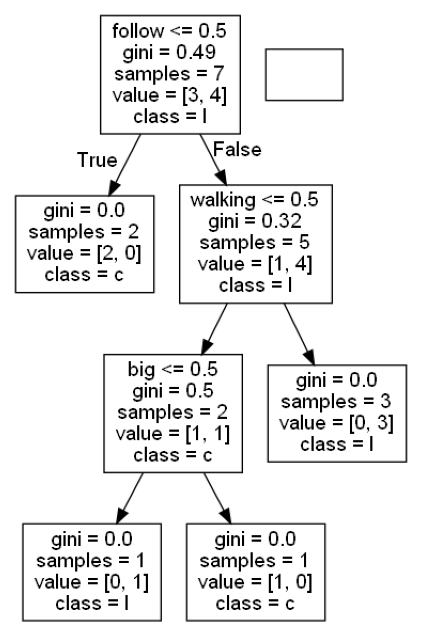

In [48]:
img = pltimg.imread('img/catdog.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()

## 강사님

In [61]:
# 범주형 변수를 레이블 인코딩 하기 2
# pd.Categorical(변수), 변수.cat.codes
cols = ['big','follow','walking','class']

for c in cols:
    catdog[c] = pd.Categorical(catdog[c])
    catdog[c] = catdog[c].cat.codes

In [73]:
dtclf = DecisionTreeClassifier(criterion='entropy')  # 기본값은 gini
dtclf.fit(data,target)

dtclf.score(data,target)

0.9

In [80]:
dot_data = tree.export_graphviz(dtclf, out_file=None,
                               feature_names=data.columns,
                               class_names=['cat','dog'])
graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('img/catdog2.png')

True

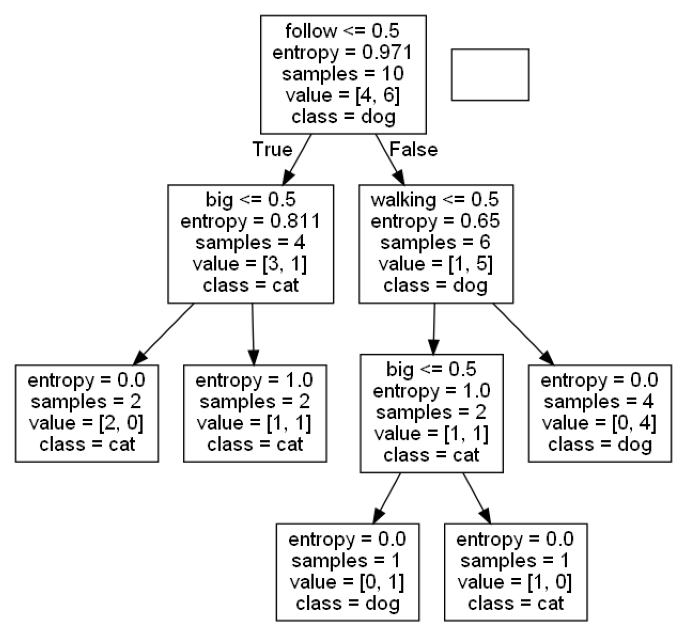

In [81]:
img = pltimg.imread('img/catdog2.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()

## scipy 패키지의 entropy 계산 함수
+ entropy([이벤트수, ...],base=로그밑수)

In [83]:
from scipy.stats import entropy

entropy([4,6],base=2)

0.9709505944546688

In [85]:
# 덩치로 분류했을 때 확률
# 덩치 클때   : 4:2
# 덩치 작을때 : 2:2
entropy([4,2],base=2), entropy([2,2],base=2)

(0.9182958340544894, 1.0)